In [69]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
import numpy as np
import matplotlib

In [90]:
label_to_color = {
    1: [0,  255, 0],
    2: [ 255,  255,  0],
    3: [255, 0, 0],
}

img_classes = np.array([[3, 1, 2, np.nan], [1, 2, 2, np.nan], [2, 2, 3, np.nan], [3, 3, 2, np.nan]])
h, w = img_classes.shape

In [91]:
img_rgb = np.zeros((h, w, 3))

In [92]:
for gray, rgb in label_to_color.items():
    img_rgb[img_classes == gray] = rgb


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


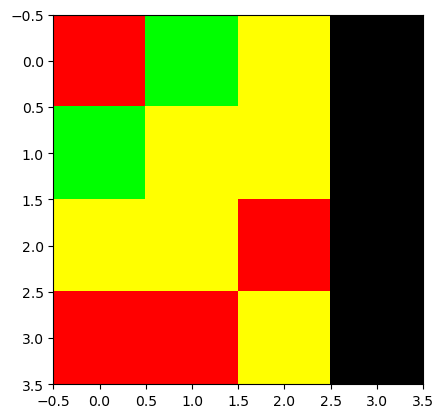

In [93]:
import matplotlib.pyplot as plt
plt.imshow(img_rgb)

In [ ]:
def colorize_raster(raster, colors=['darkgreen']):
    raster = raster.squeeze(axis=0)
    
    # Define color mapping
    color_mapping = {i: colors[i-1] for i in range(1, len(colors)+1)}
    
    # Create an array for colors
    colored_image = np.zeros((raster.shape[0], raster.shape[1], 4), dtype=np.float64)
    
    for value, color in color_mapping.items():
        mask = raster == value
        colored_image[mask] = matplotlib.colors.to_rgba(color)
    
    # Create a mask where raster value is 0
    mask = raster == 0
    
    # Set the alpha channel (transparency) based on the mask
    alpha = np.ones_like(raster)  # Default is fully opaque
    alpha[mask] = 0  # Set alpha to 0 where mask is True
    
    # Add the alpha channel to the colored image
    colored_image[..., 3] = alpha  # Set the alpha channel
    
    return colored_image

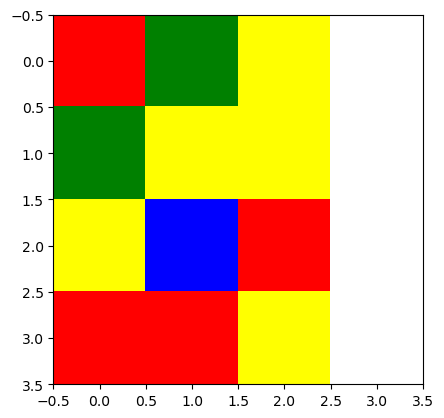

In [101]:
image = np.array([[3, 1, 2, np.nan], [1, 2, 2, np.nan], [2, 4, 3, np.nan], [3, 3, 2, np.nan]])
colors = 'green', 'yellow', 'red', 'blue'
# Define color mapping
color_mapping = {i: colors[i-1] for i in range(1, len(colors)+1)}

# Create an array for colors
colored_image = np.zeros((image.shape[0], image.shape[1], 4))
for value, color in color_mapping.items():
    colored_image[image == value] = matplotlib.colors.to_rgba(color)

plt.imshow(colored_image)

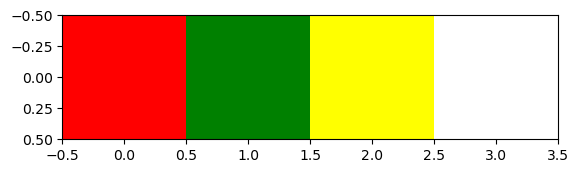

In [5]:
from spai.processing import colorize_raster
import matplotlib.pyplot as plt
import numpy as np
colors = 'green', 'yellow', 'red'
image = np.array([[[3, 1, 2, np.nan]]])
colored_image = colorize_raster(image, colors=colors)
plt.imshow(colored_image)

In [6]:
colored_image

array([[[1.        , 0.        , 0.        , 1.        ],
        [0.        , 0.50196078, 0.        , 1.        ],
        [1.        , 1.        , 0.        , 1.        ],
        [0.        , 0.        , 0.        , 0.        ]]])